In [2]:
## Downstream Analysis -- DEG  example
## author: fmh
## date:2023-11-30

In [3]:
import sys
sys.path.append('./ecc_pipe/analysis_code')
from Distribution import *
from DEG import *
from Circlize import *

In [4]:
## example data is 4 vs 4 nanopore data from CReSIL

In [5]:
## merge all analysis data in same share_path
os.listdir('./data/github_online/deg_test/')

['group.txt',
 'group1_rep1',
 'group2_rep1',
 'group1_rep2',
 'group1_rep3',
 'group1_rep4',
 'group2_rep2',
 'group2_rep3',
 'group2_rep4',
 '01.ecc_deg_output',
 '02.ecc_deg_go_kegg']

In [6]:
## first need run Distribution mode for all data
path_share = './data/github_online/deg_test/'
for file_name in os.listdir(path_share):
    if '.txt' in file_name:
        continue
    file_path = path_share+file_name+'/eccDNA_final.txt'
    _type='cresil'
    geno='hg38'
    eccDNA_dis = distribution(file_path, _type, geno)
    ecc_pipe_path = './ecc_pipe' ## please set download resource file first 
    eccDNA_dis.run_fast(ecc_pipe_path=ecc_pipe_path)
    

## DEG fast run

In [6]:
path_share = './data/github_online/deg_test/'
group_file_path = './data/github_online/deg_test/group.txt'
geno = 'hg38'
ratio = 0.5 ## overlap ratio for compute gene_counts in eccDNA
_type = 'gene' 
## gene: comput gene in eccDNA / region: comput eccDNA in gene
## example data is nanopore TGS data, so choose 'gene' , we suggest 'region' for NGS
eccDNA_deg = ecc_gene_number_deg(path_share=path_share,
                                    group_file_path=group_file_path,
                                    geno=geno,
                                    ratio=ratio,
                                   _type=_type)

Run fast Start!
	Make ecc gene number matrix start!


***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: F

	Make ecc gene number matrix end!
	deg run start!


Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package: GenomeInfoDb
Loading required package: SummarizedExperiment
Loading required package: MatrixGeneric

[1] TRUE
[1] TRUE


Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 306 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 3, 0.98%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 261, 85%
low counts [2]     : 0, 0%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

0.2
0.5
(11, 3)
(6, 3)


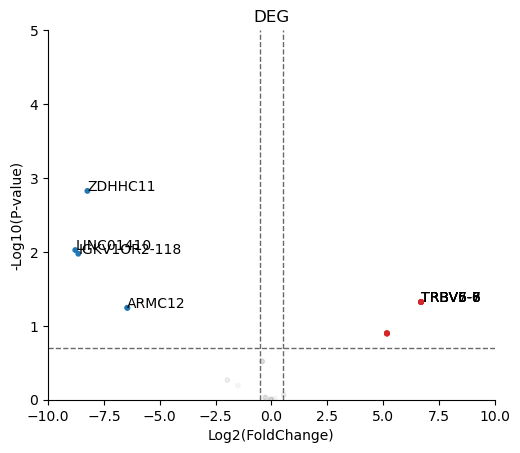

	deg run end!
clusterprofile run start!



DOSE v3.24.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, dupli

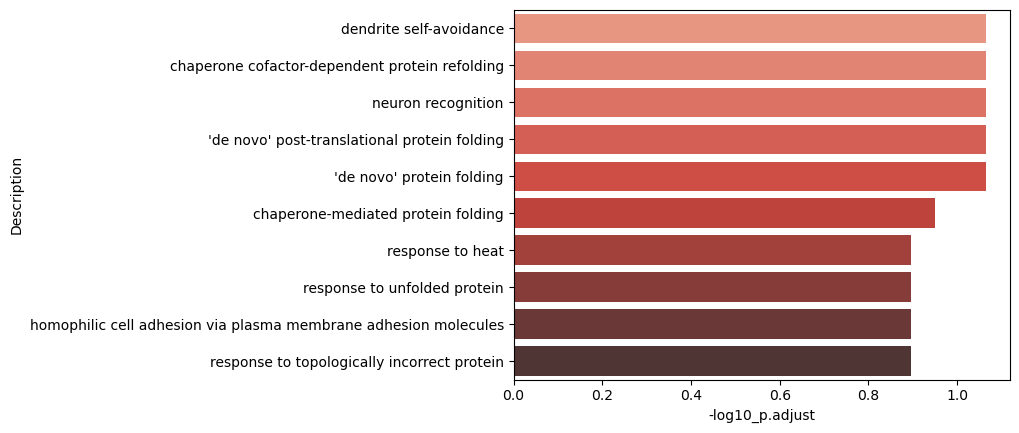

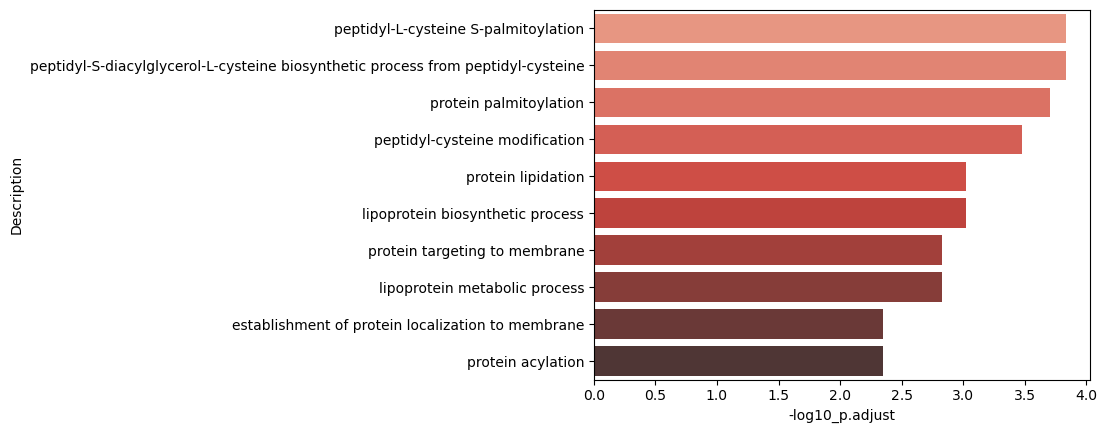

clusterprofile run end!
Run fast End!


In [7]:
ecc_pipe_path = './ecc_pipe' ## please set download resource file first 
R_env = '~/miniconda3/envs/ecc_pipe/bin/Rscript'
eccDNA_deg.run_fast(ecc_pipe_path=ecc_pipe_path, R_env=R_env,
                    mode='deseq2', ## str in ['deseq2','limma', 'edger']
                    pvalue=0.2, log2fc=0.5, xlim=10, ylim=5)

In [8]:
## result file list
os.listdir('./data/github_online/deg_test/01.ecc_deg_output/')

['count.txt',
 'deseq2_norm_matrix.csv',
 'deseq2_result.csv',
 'deseq2.volcano.pdf',
 'edger_norm_matrix.csv',
 'edger_result.csv',
 'edger.volcano.pdf',
 'limma_norm_matrix.csv',
 'limma_result.csv',
 'limma.volcano.pdf']

In [9]:
## result file list
os.listdir('./data/github_online/deg_test/02.ecc_deg_go_kegg/')

['deseq2_GO_up.csv',
 'deseq2_GO_down.csv',
 'deseq2_gsea_result_1.csv',
 'deseq2_gsea_result_2.csv',
 'deseq2_gsea_top_1.pdf',
 'deseq2_gsea_top_2.pdf',
 'deseq2_gsea_top_3.pdf',
 'deseq2_gsea_top_4.pdf',
 'deseq2_gsea_top_5.pdf',
 'deseq2_gsea_result_final.csv',
 'deseq2_GO_up.pdf',
 'deseq2_GO_down.pdf']

## Step by Step

In [8]:
## step by step
path_share = './data/github_online/deg_test/'
group_file_path = './data/github_online/deg_test/group.txt'
geno = 'hg38'
ratio = 0.5 ## overlap ratio for compute gene_counts in eccDNA
_type = 'gene' ## gene: comput gene in eccDNA / region: comput eccDNA in gene
## example data is nanopore TGS data, so choose 'gene' , we suggest 'region' for NGS
eccDNA_deg = ecc_gene_number_deg(path_share=path_share,
                                    group_file_path=group_file_path,
                                    geno=geno,
                                    ratio=ratio,
                                   _type=_type)

In [11]:
## annotate eccDNA in gene in params from '_type' and 'trim'
ecc_pipe_path = './ecc_pipe' ## please set download resource file first 
eccDNA_deg.make_ecc_number_matrix(ecc_pipe_path=ecc_pipe_path) 

Make ecc gene number matrix start!


***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: File ./ecc_pipe/resource/Analysis/reference/genes.10X.hg38.all.bed has inconsistent naming convention for record:
GL000009.2	56140	58376	BX004987.1

***** WARNING: F

Make ecc gene number matrix end!


deseq2 run start!


Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package: GenomeInfoDb
Loading required package: SummarizedExperiment
Loading required package: MatrixGeneric

[1] TRUE
[1] TRUE


Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 306 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 3, 0.98%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 261, 85%
low counts [2]     : 0, 0%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

~/miniconda3/envs/ecc_pipe/bin/Rscript ./ecc_pipe/analysis_code/deseq2.R ./data/github_online/deg_test//01.ecc_deg_output/count.txt ./data/github_online/deg_test/group.txt ./data/github_online/deg_test//01.ecc_deg_output/
(6, 3)
(4, 3)


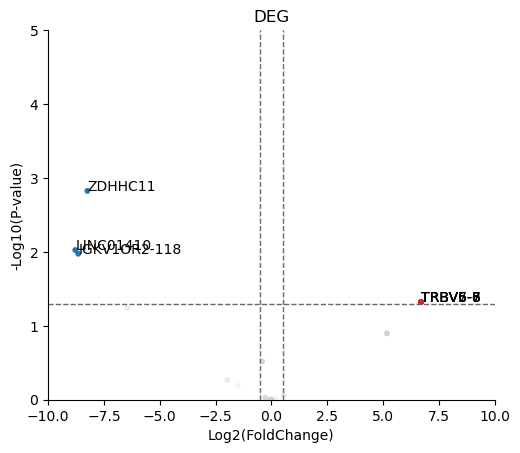

deseq2 run end!


In [12]:
## deseq2 DEG
ecc_pipe_path = './ecc_pipe' ## please set download resource file first 
R_env = '~/miniconda3/envs/ecc_pipe/bin/Rscript'
eccDNA_deg.deseq2_run(pvalue=0.05, log2fc=0.5, xlim=10, ylim=5,
                      mode='deseq2', ## str in ['deseq2','limma', 'edger']
                      ecc_pipe_path=ecc_pipe_path, R_env=R_env)

clusterprofile run start!



DOSE v3.24.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, dupli

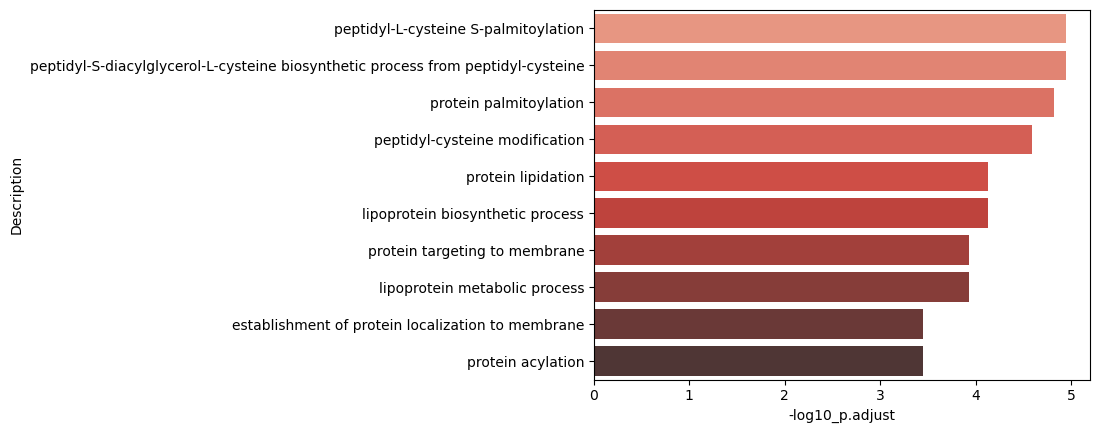

clusterprofile run end!


In [14]:
## clusterprofile GO + GSEA
ecc_pipe_path = './ecc_pipe' ## please set download resource file first 
R_env = '~/miniconda3/envs/ecc_pipe/bin/Rscript'
eccDNA_deg.clusterprofile_run(pvalue=0.05, log2fc=0.5,
                              mode='deseq2', ## str in ['deseq2','limma', 'edger']
                              ecc_pipe_path=ecc_pipe_path, R_env=R_env)

In [15]:
## result file list
os.listdir('./data/github_online/deg_test/01.ecc_deg_output/')

['count.txt',
 'deseq2_norm_matrix.csv',
 'deseq2_result.csv',
 'deseq2.volcano.pdf']

In [16]:
## result file list
os.listdir('./data/github_online/deg_test/02.ecc_deg_go_kegg/')

['GO_down.csv', 'GO_down.pdf']